<a href="https://colab.research.google.com/github/ikinikar/IPL_Totals/blob/main/Real_IPLTotals_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Goal: Create a classifier that predicts the results of games based on other matches and details about that match
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Import statements + reading in data
import numpy as np
import pandas as pd


import seaborn as sns

df = pd.read_csv("/content/gdrive/MyDrive/ipl_dataset.csv")



In [ ]:
#Pre-Processing as per https://www.kaggle.com/code/akashdubey022/data-analysis-and-prediction-of-ipl/notebook
#Step 1: Removing uneeded columns
df.drop(['full_scorecard', 'man_of_the_match', 'margin', 'place'],axis =1 , inplace = True)
df

,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,stadium
0,Chennai Super Kings,Kolkata Knight Riders,131.0,133.0,Kolkata Knight Riders,Field,KKR,Wankhede Stadium
1,Mumbai Indians,Delhi Capitals,177.0,179.0,Delhi Capitals,Field,Capitals,Brabourne Stadium
2,Royal Challengers Bangalore,Punjab Kings,205.0,208.0,Punjab Kings,Field,Punjab,Dr DY Patil Sports Academy
3,Lucknow Super Giants,Gujarat Titans,158.0,161.0,Gujarat Titans,Field,Titans,Wankhede Stadium
4,Rajasthan Royals,Sunrisers Hyderabad,210.0,149.0,Sunrisers Hyderabad,Field,Royals,Maharashtra Cricket Association Stadium
...,...,...,...,...,...,...,...,...
953,Royal Challengers Bangalore,Mumbai Indians,NaN,126.0,Mumbai Indians,Field,Mumbai,M Chinnaswamy Stadium
954,Kings XI Punjab,Rajasthan Royals,221.0,180.0,Rajasthan Royals,Field,Kings,Punjab Cricket Association Stadium
955,Rajasthan Royals,Delhi Daredevils,192.0,87.0,Delhi Daredevils,Field,Royals,Wankhede Stadium
956,Kings XI Punjab,Chennai Super Kings,112.0,116.0,Kings XI Punjab,Bat,Super,Wankhede Stadium


In [ ]:
#Removing Null Values
df.iloc[:,:-1]
df.dropna(inplace=True)


In [ ]:
#Replacing old team names with the new ones for the sake of consistency
df['team1']=df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
df['team2']=df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
df['toss_winner']=df['toss_winner'].str.replace('Delhi Daredevils','Delhi Capitals')

df['team1']=df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['team2']=df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['toss_winner']=df['toss_winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

df['team1']=df['team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df['team2']=df['team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df['toss_winner']=df['toss_winner'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

df['team1']=df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
df['team2']=df['team2'].str.replace('Kings XI Punjab','Punjab Kings')
df['toss_winner']=df['toss_winner'].str.replace('Kings XI Punjab','Punjab Kings')

In [ ]:
#Replacing Team Names With Quicker Acronyms
df['team1']=df['team1'].str.replace('Delhi Capitals', 'DC')
df['team2']=df['team2'].str.replace('Delhi Capitals', 'DC')
df['winner']=df['winner'].str.replace('Capitals','DC')
df['winner']=df['winner'].str.replace('Daredevils','DC')
df['toss_winner']=df['toss_winner'].str.replace('Delhi Capitals', 'DC')

df['team1']=df['team1'].str.replace('Punjab Kings','PBKS')
df['team2']=df['team2'].str.replace('Punjab Kings','PBKS')
df['winner']=df['winner'].str.replace('Punjab','PBKS')
df['toss_winner']=df['toss_winner'].str.replace('Punjab Kings', 'PBKS')

df['team1']=df['team1'].str.replace('Gujarat Titans','GT')
df['team2']=df['team2'].str.replace('Gujarat Titans','GT')
df['winner']=df['winner'].str.replace('Titans','GT')
df['toss_winner']=df['toss_winner'].str.replace('Gujarat Titans','GT')

df['team1']=df['team1'].str.replace('Rajasthan Royals','RR')
df['team2']=df['team2'].str.replace('Rajasthan Royals','RR')
df['winner']=df['winner'].str.replace('Royals','RR')
df['toss_winner']=df['toss_winner'].str.replace('Rajasthan Royals','RR')

df['team1']=df['team1'].str.replace('Chennai Super Kings','CSK')
df['team2']=df['team2'].str.replace('Chennai Super Kings','CSK')
df['winner']=df['winner'].str.replace('Super','CSK')
df['toss_winner']=df['toss_winner'].str.replace('Chennai Super Kings','CSK')

df['team1']=df['team1'].str.replace('Sunrisers Hyderabad','SRH')
df['team2']=df['team2'].str.replace('Sunrisers Hyderabad','SRH')
df['winner']=df['winner'].str.replace('Sunrisers','SRH')
df['winner']=df['winner'].str.replace('Chargers','SRH')
df['toss_winner']=df['toss_winner'].str.replace('Sunrisers Hyderabad','SRH')

df['team1']=df['team1'].str.replace('Mumbai Indians','MI')
df['team2']=df['team2'].str.replace('Mumbai Indians','MI')
df['winner']=df['winner'].str.replace('Mumbai','MI')
df['toss_winner']=df['toss_winner'].str.replace('Mumbai Indians','MI')

df['team1']=df['team1'].str.replace('Royal Challengers Bangalore','RCB')
df['team2']=df['team2'].str.replace('Royal Challengers Bangalore','RCB')
df['toss_winner']=df['toss_winner'].str.replace('Royal Challengers Bangalore','RCB')

df['team1']=df['team1'].str.replace('Kolkata Knight Riders','KKR')
df['team2']=df['team2'].str.replace('Kolkata Knight Riders','KKR')
df['toss_winner']=df['toss_winner'].str.replace('Kolkata Knight Riders','KKR')

df['team1']=df['team1'].str.replace('Punjab Kings','PBKS')
df['team2']=df['team2'].str.replace('Punjab Kings','PBKS')
df['winner']=df['winner'].str.replace('Kings','PBKS')
df['toss_winner']=df['toss_winner'].str.replace('Punjab Kings','PBKS')

df['team1']=df['team1'].str.replace('Gujarat Lions','GL')
df['team2']=df['team2'].str.replace('Gujarat Lions','GL')
df['winner']=df['winner'].str.replace('Guj','GL')
df['toss_winner']=df['toss_winner'].str.replace('Gujarat Lions','GL')

df['team1']=df['team1'].str.replace('Pune Warriors India','PWI')
df['team2']=df['team2'].str.replace('Pune Warriors India','PWI')
df['winner']=df['winner'].str.replace('Warriors','PWI')
df['toss_winner']=df['toss_winner'].str.replace('Pune Warriors India','PWI')

df['team1']=df['team1'].str.replace('Kochi Tuskers Kerala','KTK')
df['team2']=df['team2'].str.replace('Kochi Tuskers Kerala','KTK')
df['winner']=df['winner'].str.replace('Kochi','KTK')
df['toss_winner']=df['toss_winner'].str.replace('Kochi Tuskers Kerala','KTK')

df['team1']=df['team1'].str.replace('Lucknow Super Giants','LSG')
df['team2']=df['team2'].str.replace('Lucknow Super Giants','LSG')
df['winner']=df['winner'].str.replace('Super','LSG')
df['toss_winner']=df['toss_winner'].str.replace('Lucknow Super Giants','LSG')

df['team1']=df['team1'].str.replace('Rising Pune Supergiant','RPS')
df['team2']=df['team2'].str.replace('Rising Pune Supergiant','RPS')
df['winner']=df['winner'].str.replace('Supergiant','RPS')
df['winner']=df['winner'].str.replace('Supergiants','RPS')
df['winner']=df['winner'].str.replace('CSKgiants','RPS')
df['winner']=df['winner'].str.replace('CSKgiant','RPS')
df['winner']=df['winner'].str.replace('RPSs','RPS')
df['toss_winner']=df['toss_winner'].str.replace('Rising Pune Supergiant','RPS')
df

,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,stadium
0,CSK,KKR,131.0,133.0,KKR,Field,KKR,Wankhede Stadium
1,MI,DC,177.0,179.0,DC,Field,DC,Brabourne Stadium
2,RCB,PBKS,205.0,208.0,PBKS,Field,PBKS,Dr DY Patil Sports Academy
3,LSG,GT,158.0,161.0,GT,Field,GT,Wankhede Stadium
4,RR,SRH,210.0,149.0,SRH,Field,RR,Maharashtra Cricket Association Stadium
...,...,...,...,...,...,...,...,...
952,SRH,CSK,147.0,148.0,SRH,Bat,CSK,Rajiv Gandhi International Stadium
954,PBKS,RR,221.0,180.0,RR,Field,PBKS,Punjab Cricket Association Stadium
955,RR,DC,192.0,87.0,DC,Field,RR,Wankhede Stadium
956,PBKS,CSK,112.0,116.0,PBKS,Bat,CSK,Wankhede Stadium


In [ ]:
#My own processing steps start here (part 1)
#Adding in a column for the batting first score
bat_first_arr = []
bat_first_team = []
chase_team = []
for index, row in df.iterrows():
  if row['toss_choice'] == 'Field':
    if row['toss_winner'] == row['team1']:
      bat_first_arr.append(row['team2_score'])
      bat_first_team.append(row['team2'])
      chase_team.append(row['team1'])

    if row['toss_winner'] == row['team2']:
      bat_first_arr.append(row['team1_score'])
      bat_first_team.append(row['team1'])
      chase_team.append(row['team2'])

  if row['toss_choice'] == 'Bat':
    if row['toss_winner'] == row['team1']:
      bat_first_arr.append(row['team1_score'])
      bat_first_team.append(row['team1'])
      chase_team.append(row['team2'])

    if row['toss_winner'] == row['team2']:
      bat_first_arr.append(row['team2_score'])
      bat_first_team.append(row['team2'])
      chase_team.append(row['team1'])


df2 = df.assign(batting_first = bat_first_team, chasing = chase_team, bat_first = bat_first_arr)
df2.drop(['team1', 'team2', 'team1_score', 'team2_score', 'stadium'], axis =1 , inplace = True) #Too many matches are played in stadiums with less than 50 IPL matches for stadiums to be a consistent metric

#Removing teams with low match counts
df2 = df2.loc[df2['batting_first'] != 'RPS']
df2 = df2.loc[df2['batting_first'] != 'GL']
df2 = df2.loc[df2['batting_first'] != 'GT']
df2 = df2.loc[df2['batting_first'] != 'PWI']
df2 = df2.loc[df2['batting_first'] != 'KTK']

df2 = df2.loc[df2['chasing'] != 'RPS']
df2 = df2.loc[df2['chasing'] != 'GL']
df2 = df2.loc[df2['chasing'] != 'GT']
df2 = df2.loc[df2['chasing'] != 'PWI']
df2 = df2.loc[df2['chasing'] != 'KTK']

#Removing tied and no results (there are not enough of them to take into account)
df2 = df2.loc[df2['winner'] != 'PWI']
df2 = df2.loc[df2['winner'] != 'Tied']
df2 = df2.loc[df2['winner'] != 'No']

df2

,toss_winner,toss_choice,winner,batting_first,chasing,bat_first
0,KKR,Field,KKR,CSK,KKR,131.0
1,DC,Field,DC,MI,DC,177.0
2,PBKS,Field,PBKS,RCB,PBKS,205.0
4,SRH,Field,RR,RR,SRH,210.0
5,RCB,Field,RCB,KKR,RCB,128.0
...,...,...,...,...,...,...
952,SRH,Bat,CSK,SRH,CSK,147.0
954,RR,Field,PBKS,PBKS,RR,221.0
955,DC,Field,RR,RR,DC,192.0
956,PBKS,Bat,CSK,PBKS,CSK,112.0


In [ ]:
#Part 2 of pre-processing
x= df2.drop(['winner'],axis=1)
x = pd.get_dummies(x, ['toss_winner', 'batting_first', 'chasing', 'bat_first'])
y = df2['winner']
y = pd.get_dummies(y)
print(y)

     CSK  DC  KKR  MI  PBKS  RCB  RR  SRH
0      0   0    1   0     0    0   0    0
1      0   1    0   0     0    0   0    0
2      0   0    0   0     1    0   0    0
4      0   0    0   0     0    0   1    0
5      0   0    0   0     0    1   0    0
..   ...  ..  ...  ..   ...  ...  ..  ...
952    1   0    0   0     0    0   0    0
954    0   0    0   0     1    0   0    0
955    0   0    0   0     0    0   1    0
956    1   0    0   0     0    0   0    0
957    0   0    0   0     0    0   1    0

[821 rows x 8 columns]


In [ ]:
# Task #2: Implement a Tensorflow model on the dataset (Original work but this isn't the final product yet)
#Final steps before creating
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, shuffle = True)

#Getting validation data

xt_r, xv_r, yt_r, yv_r = train_test_split(x_train, y_train, train_size = 0.8, shuffle = True)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU, PReLU

print(xt_r.shape, yt_r.shape)
print(xv_r.shape, yv_r.shape)
print(x_test.shape, y_test.shape)
classes = 8 #Number of distinct teams

(492, 33) (492, 8)
(123, 33) (123, 8)
(206, 33) (206, 8)


In [ ]:
#Constructing neural network w/ TF/Keras that has
e = 1000
batch_size = 80
model = tf.keras.Sequential([
                    Dense(33, input_shape = [33,]),
                    LeakyReLU(),
                    Dense(18),
                    LeakyReLU(),
                    Dense(12),
                    LeakyReLU(),
                    Dense(8, activation = 'softmax')
])
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
) # use the Adam optimizer
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 33)                1122      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 33)                0         
                                                                 
 dense_5 (Dense)             (None, 18)                612       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 18)                0         
                                                                 
 dense_6 (Dense)             (None, 12)                228       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 12)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                

In [ ]:
#Fitting the model created above
history = model.fit(xt_r, yt_r, epochs = e, batch_size = batch_size,validation_data = (xv_r, yv_r), callbacks = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200))



Epoch 1/1000
7/7 [==============================] - 0s 35ms/step - loss: 0.5730 - accuracy: 0.7012 - val_loss: 0.9116 - val_accuracy: 0.5447
Epoch 2/1000
7/7 [==============================] - 0s 22ms/step - loss: 0.5865 - accuracy: 0.7093 - val_loss: 0.8958 - val_accuracy: 0.4959
Epoch 3/1000
7/7 [==============================] - 0s 23ms/step - loss: 0.5811 - accuracy: 0.7073 - val_loss: 0.8817 - val_accuracy: 0.5366
Epoch 4/1000
7/7 [==============================] - 0s 23ms/step - loss: 0.5706 - accuracy: 0.7134 - val_loss: 0.9343 - val_accuracy: 0.5285
Epoch 5/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.5431 - accuracy: 0.7154 - val_loss: 0.9011 - val_accuracy: 0.5285
Epoch 6/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.5799 - accuracy: 0.6829 - val_loss: 0.8916 - val_accuracy: 0.5122
Epoch 7/1000
7/7 [==============================] - 0s 23ms/step - loss: 0.5393 - accuracy: 0.7378 - val_loss: 0.8882 - val_accuracy: 0.5610
Epoch 8/1000


In [ ]:
model.evaluate(x_test, y_test, batch_size = 206)

1/1 [==============================] - 0s 27ms/step - loss: 0.8372 - accuracy: 0.5728


[0.8371953368186951, 0.5728155374526978]

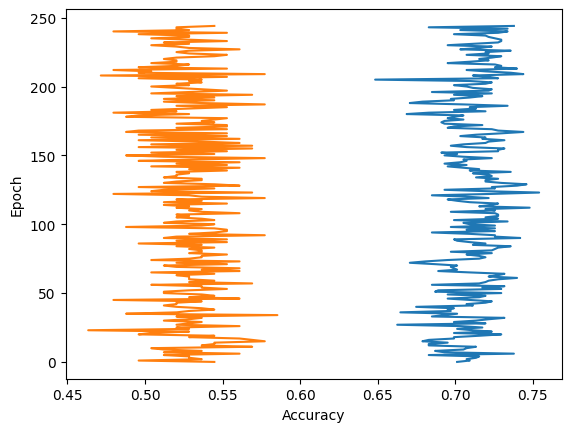

In [ ]:
from matplotlib.pylab import plt
# plot training loss and training accuracy vs epoch number
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.plot(history.history['accuracy'], history.epoch)
plt.plot(history.history['val_accuracy'], history.epoch)
 # Plot loss and val_loss + accuracy and val_accuracy seperately